<a href="https://colab.research.google.com/github/lukaszek358/SDA/blob/main/projekt_ko%C5%84cowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
raw_flights = pd.read_csv('/content/drive/MyDrive/flights.csv')
raw_flights.head()

<ipython-input-5-67ec42abcedd>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_flights = pd.read_csv('/content/drive/MyDrive/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
raw_flights = raw_flights.rename(columns=str.lower)

In [7]:
raw_flights['date'] = pd.to_datetime(raw_flights[['year','month', 'day']], format='%Y-%m-%d')
first_column = raw_flights.pop('date')
raw_flights.insert(0, 'date', first_column)

In [8]:
raw_flights = raw_flights.drop(['year', 'day', 'flight_number', 'tail_number', 'taxi_in', 'wheels_on', 'elapsed_time', 'diverted', 'air_time', 'cancelled', 'cancellation_reason', 'air_system_delay','security_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay', 'departure_time', 'arrival_time'], axis=1)
raw_flights.head(10)

,date,month,day_of_week,airline,origin_airport,destination_airport,scheduled_departure,departure_delay,taxi_out,wheels_off,scheduled_time,distance,scheduled_arrival,arrival_delay
0,2015-01-01,1,4,AS,ANC,SEA,5,-11.0,21.0,15.0,205.0,1448,430,-22.0
1,2015-01-01,1,4,AA,LAX,PBI,10,-8.0,12.0,14.0,280.0,2330,750,-9.0
2,2015-01-01,1,4,US,SFO,CLT,20,-2.0,16.0,34.0,286.0,2296,806,5.0
3,2015-01-01,1,4,AA,LAX,MIA,20,-5.0,15.0,30.0,285.0,2342,805,-9.0
4,2015-01-01,1,4,AS,SEA,ANC,25,-1.0,11.0,35.0,235.0,1448,320,-21.0
5,2015-01-01,1,4,DL,SFO,MSP,25,-5.0,18.0,38.0,217.0,1589,602,8.0
6,2015-01-01,1,4,NK,LAS,MSP,25,-6.0,11.0,30.0,181.0,1299,526,-17.0
7,2015-01-01,1,4,US,LAX,CLT,30,14.0,13.0,57.0,273.0,2125,803,-10.0
8,2015-01-01,1,4,AA,SFO,DFW,30,-11.0,17.0,36.0,195.0,1464,545,-13.0
9,2015-01-01,1,4,DL,LAS,ATL,30,3.0,12.0,45.0,221.0,1747,711,-15.0


In [23]:
# raw_flights = raw_flights.drop(columns = 'Unnamed: 0')

In [9]:
raw_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 14 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   month                int64         
 2   day_of_week          int64         
 3   airline              object        
 4   origin_airport       object        
 5   destination_airport  object        
 6   scheduled_departure  int64         
 7   departure_delay      float64       
 8   taxi_out             float64       
 9   wheels_off           float64       
 10  scheduled_time       float64       
 11  distance             int64         
 12  scheduled_arrival    int64         
 13  arrival_delay        float64       
dtypes: datetime64[ns](1), float64(5), int64(5), object(3)
memory usage: 621.5+ MB


In [10]:
from datetime import datetime

In [11]:
def zamien_na_godziny_i_minuty(x):
    if x == 2359:
        return '23:59'
    elif x == 2400:
        return '00:00'

    else:
        x = str(x).zfill(4)
        return x[:2] + ':' + x[2:]

In [12]:
raw_flights['scheduled_departure'] = raw_flights['scheduled_departure'].apply(zamien_na_godziny_i_minuty)
raw_flights['scheduled_departure'] = pd.to_datetime(raw_flights['scheduled_departure']).dt.minute + pd.to_datetime(raw_flights['scheduled_departure']).dt.hour * 60
raw_flights['scheduled_departure']

0             5
1            10
2            20
3            20
4            25
           ... 
5819074    1439
5819075    1439
5819076    1439
5819077    1439
5819078    1439
Name: scheduled_departure, Length: 5819079, dtype: int64

In [14]:
raw_flights['scheduled_arrival'] = raw_flights['scheduled_arrival'].apply(zamien_na_godziny_i_minuty)
raw_flights['scheduled_arrival'] = pd.to_datetime(raw_flights['scheduled_arrival']).dt.minute + pd.to_datetime(raw_flights['scheduled_arrival']).dt.hour * 60
raw_flights['scheduled_arrival']

0          270
1          470
2          486
3          485
4          200
          ... 
5819074    499
5819075    286
5819076    280
5819077    220
5819078    280
Name: scheduled_arrival, Length: 5819079, dtype: int64

In [15]:
raw_flights['scheduled_departure_norm'] = 2 * math.pi * raw_flights['scheduled_departure'] / 1440
raw_flights["cos_scheduled_departure_norm"] = np.cos(raw_flights['scheduled_departure_norm'])

In [16]:
raw_flights

,date,month,day_of_week,airline,origin_airport,destination_airport,scheduled_departure,departure_delay,taxi_out,wheels_off,scheduled_time,distance,scheduled_arrival,arrival_delay,scheduled_departure_norm,cos_scheduled_departure_norm
0,2015-01-01,1,4,AS,ANC,SEA,5,-11.0,21.0,15.0,205.0,1448,270,-22.0,0.021817,0.999762
1,2015-01-01,1,4,AA,LAX,PBI,10,-8.0,12.0,14.0,280.0,2330,470,-9.0,0.043633,0.999048
2,2015-01-01,1,4,US,SFO,CLT,20,-2.0,16.0,34.0,286.0,2296,486,5.0,0.087266,0.996195
3,2015-01-01,1,4,AA,LAX,MIA,20,-5.0,15.0,30.0,285.0,2342,485,-9.0,0.087266,0.996195
4,2015-01-01,1,4,AS,SEA,ANC,25,-1.0,11.0,35.0,235.0,1448,200,-21.0,0.109083,0.994056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015-12-31,12,4,B6,LAX,BOS,1439,-4.0,22.0,17.0,320.0,2611,499,-26.0,6.278822,0.999990
5819075,2015-12-31,12,4,B6,JFK,PSE,1439,-4.0,17.0,12.0,227.0,1617,286,-16.0,6.278822,0.999990
5819076,2015-12-31,12,4,B6,JFK,SJU,1439,-9.0,17.0,7.0,221.0,1598,280,-8.0,6.278822,0.999990
5819077,2015-12-31,12,4,B6,MCO,SJU,1439,-6.0,10.0,3.0,161.0,1189,220,-10.0,6.278822,0.999990


In [17]:
raw_flights['day_of_week_norm'] = 2 * math.pi * raw_flights['day_of_week'] / raw_flights.day_of_week.max()
raw_flights["cos_day_of_week_norm"] = np.cos(raw_flights['day_of_week_norm'])

In [ ]:
# raw_flights[raw_flights.scheduled_departure == 5]

In [18]:
raw_flights = raw_flights.drop(columns = ['scheduled_departure', 'day_of_week'] )
raw_flights

,date,month,airline,origin_airport,destination_airport,departure_delay,taxi_out,wheels_off,scheduled_time,distance,scheduled_arrival,arrival_delay,scheduled_departure_norm,cos_scheduled_departure_norm,day_of_week_norm,cos_day_of_week_norm
0,2015-01-01,1,AS,ANC,SEA,-11.0,21.0,15.0,205.0,1448,270,-22.0,0.021817,0.999762,3.590392,-0.900969
1,2015-01-01,1,AA,LAX,PBI,-8.0,12.0,14.0,280.0,2330,470,-9.0,0.043633,0.999048,3.590392,-0.900969
2,2015-01-01,1,US,SFO,CLT,-2.0,16.0,34.0,286.0,2296,486,5.0,0.087266,0.996195,3.590392,-0.900969
3,2015-01-01,1,AA,LAX,MIA,-5.0,15.0,30.0,285.0,2342,485,-9.0,0.087266,0.996195,3.590392,-0.900969
4,2015-01-01,1,AS,SEA,ANC,-1.0,11.0,35.0,235.0,1448,200,-21.0,0.109083,0.994056,3.590392,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015-12-31,12,B6,LAX,BOS,-4.0,22.0,17.0,320.0,2611,499,-26.0,6.278822,0.999990,3.590392,-0.900969
5819075,2015-12-31,12,B6,JFK,PSE,-4.0,17.0,12.0,227.0,1617,286,-16.0,6.278822,0.999990,3.590392,-0.900969
5819076,2015-12-31,12,B6,JFK,SJU,-9.0,17.0,7.0,221.0,1598,280,-8.0,6.278822,0.999990,3.590392,-0.900969
5819077,2015-12-31,12,B6,MCO,SJU,-6.0,10.0,3.0,161.0,1189,220,-10.0,6.278822,0.999990,3.590392,-0.900969


In [19]:
raw_flights['scheduled_arrival_norm'] = 2 * math.pi * raw_flights['scheduled_arrival'] / 1440
raw_flights['cos_scheduled_arrival_norm'] = np.cos(raw_flights['scheduled_arrival_norm'])

In [20]:
raw_flights = raw_flights.drop(columns = ['scheduled_arrival'])

In [24]:
# raw_flights.month.max()

12

In [25]:
raw_flights['month_norm'] = 2 * math.pi * raw_flights['month'] / raw_flights.month.max()
raw_flights['cos_month_norm'] = np.cos(raw_flights['month_norm'])

In [28]:
raw_flights = raw_flights.drop(columns = ['month_norm'])

In [29]:
raw_flights

,date,month,airline,origin_airport,destination_airport,departure_delay,taxi_out,wheels_off,scheduled_time,distance,arrival_delay,scheduled_departure_norm,cos_scheduled_departure_norm,day_of_week_norm,cos_day_of_week_norm,scheduled_arrival_norm,cos_scheduled_arrival_norm,cos_month_norm
0,2015-01-01,1,AS,ANC,SEA,-11.0,21.0,15.0,205.0,1448,-22.0,0.021817,0.999762,3.590392,-0.900969,1.178097,0.382683,0.866025
1,2015-01-01,1,AA,LAX,PBI,-8.0,12.0,14.0,280.0,2330,-9.0,0.043633,0.999048,3.590392,-0.900969,2.050762,-0.461749,0.866025
2,2015-01-01,1,US,SFO,CLT,-2.0,16.0,34.0,286.0,2296,5.0,0.087266,0.996195,3.590392,-0.900969,2.120575,-0.522499,0.866025
3,2015-01-01,1,AA,LAX,MIA,-5.0,15.0,30.0,285.0,2342,-9.0,0.087266,0.996195,3.590392,-0.900969,2.116212,-0.518773,0.866025
4,2015-01-01,1,AS,SEA,ANC,-1.0,11.0,35.0,235.0,1448,-21.0,0.109083,0.994056,3.590392,-0.900969,0.872665,0.642788,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015-12-31,12,B6,LAX,BOS,-4.0,22.0,17.0,320.0,2611,-26.0,6.278822,0.999990,3.590392,-0.900969,2.177298,-0.569997,1.000000
5819075,2015-12-31,12,B6,JFK,PSE,-4.0,17.0,12.0,227.0,1617,-16.0,6.278822,0.999990,3.590392,-0.900969,1.247910,0.317305,1.000000
5819076,2015-12-31,12,B6,JFK,SJU,-9.0,17.0,7.0,221.0,1598,-8.0,6.278822,0.999990,3.590392,-0.900969,1.221730,0.342020,1.000000
5819077,2015-12-31,12,B6,MCO,SJU,-6.0,10.0,3.0,161.0,1189,-10.0,6.278822,0.999990,3.590392,-0.900969,0.959931,0.573576,1.000000


<ipython-input-30-1f3b4e49e5f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = raw_flights.corr()


<Axes: >

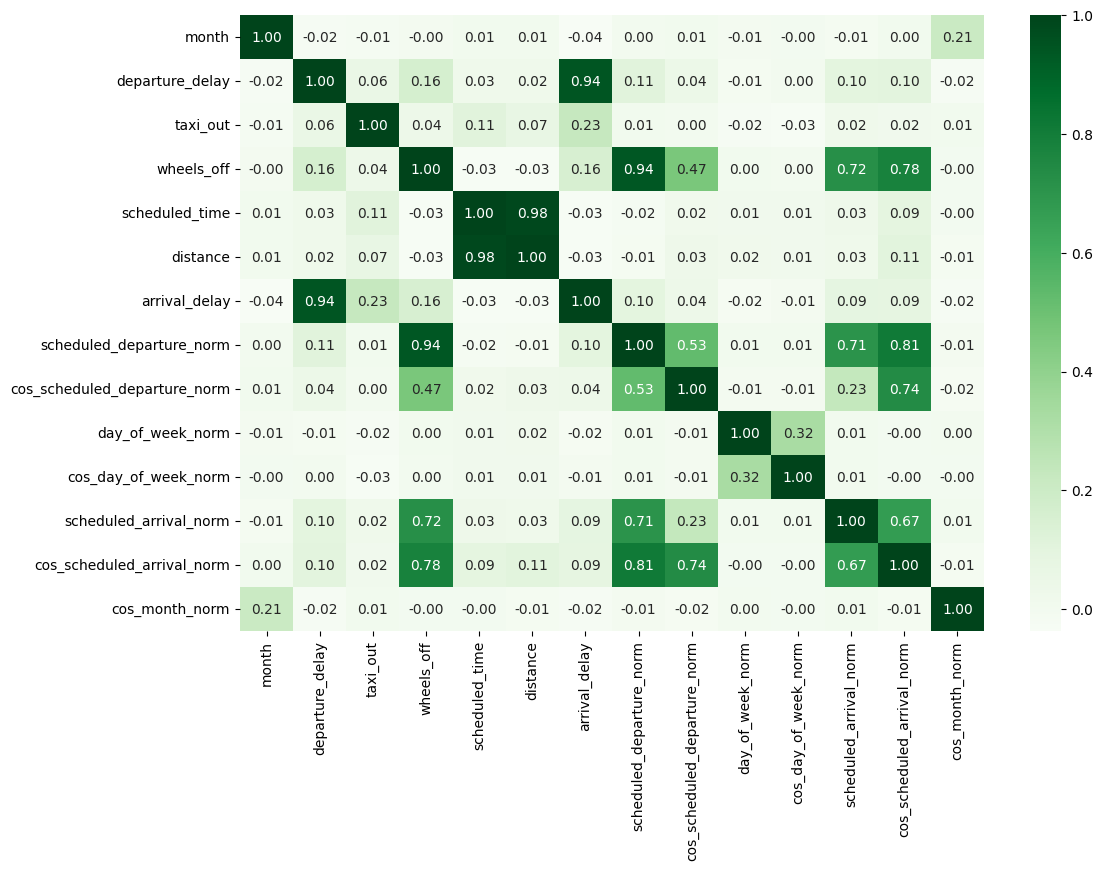

In [30]:
corr = raw_flights.corr()

f, ax = plt.subplots(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt= '.2f', cmap = 'Greens', )